# Clustering

## Author: Maria Ingold

## Task A: Iris data
- Perform K-Means clustering on the dataset, iris.csv (from the UCI Machine Learning Repository).
- Before using the data for clustering, you might have to remove a few columns because the K-Means algorithm involves the calculation of Euclidian distance.
- You can choose various values of K; however, you must also choose K = 3 in this case.
- Upon clustering at K = 3, check how much similar your three clusters are as compared to the labels of species – setosa, versicolour, and verginica.

## Task B: Wine data
- Perform K-Means clustering on the dataset, wine.csv (from the UCI Machine Learning Repository).
- Before using the data for clustering, you might have to remove a few columns like in the previous task.
- You can choose various values of K; however, you must also choose K = 3 in this case.
- Upon clustering at K = 3, check how much similar your three clusters are as compared to the labels of wines – 1, 2, and 3.

## Task C: WeatherAUS data
- Perform K-Means clustering on the dataset, weatherAUS.csv (from the Kaggle site).
- Again, you will have to remove a few columns from this data and make it useful for clustering.
- Play with a range of values of K, from, K=2 to K=6 and try to visualise the results of clustering using two-dimensional scatter plots.







### Import libraries


In [1]:
import pandas as pd                              # Data manipulation
import matplotlib.pyplot as plt                  # Plotting
import matplotlib.lines as mlines                # Custom legend
from sklearn.cluster import KMeans               # Clustering algorithm
from sklearn.preprocessing import StandardScaler # Normalise data
from sklearn.preprocessing import LabelEncoder   # Convert labels to numerical
from sklearn.metrics import adjusted_rand_score  # Adjusted Rand Index (ARI)
from sklearn.decomposition import PCA            # Dimensionality reduction

## Task A: Iris

### Load data

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Descriptive analysis

- There are no null values
- species is categorical

In [3]:
print("Number of columns: ", len(iris_df.columns))
print("Number of rows: ", len(iris_df))

Number of columns:  5
Number of rows:  150


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Preprocessing

Extract numerical features and categorical species label

In [5]:
X_iris = iris_df.drop('species', axis=1)
y_iris_true = iris_df['species']

Encode species into numerical and add to dataset

In [6]:
le_iris = LabelEncoder()
iris_df['species_encoded'] = le_iris.fit_transform(iris_df['species'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


Map species to species_encoded

In [7]:
species_map = dict(zip(le_iris.classes_, le_iris.transform(le_iris.classes_)))
print(species_map)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


### Normalise features

In [8]:
iris_scaler = StandardScaler()
X_iris_normalised = iris_scaler.fit_transform(X_iris)

### K-means Clustering

- Cluster = 3


In [9]:
kmeans_iris = KMeans(n_clusters=3, random_state=0)
kmeans_iris.fit(X_iris_normalised)

KMeans(n_clusters=3, random_state=0)

### Insights

#### Cluster labels to df

- Add cluster column to table.
- Using iris_df which did not *drop* species, can see the relationship between species and cluster.

In [10]:
iris_df['cluster'] = kmeans_iris.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,cluster
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1


#### Compare clusters to species labels

##### Accuracy

- About 64% accurate

In [11]:
# Map species names to integers for comparison
species_to_int = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_iris_true_mapped = y_iris_true.map(species_to_int)

# Compute similarity using Adjusted Rand Index
similarity_score = adjusted_rand_score(y_iris_true_mapped, iris_df['cluster'])
similarity_score

0.6410058621782706

In [12]:
display(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,cluster
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,1
2,4.7,3.2,1.3,0.2,setosa,0,1
3,4.6,3.1,1.5,0.2,setosa,0,1
4,5.0,3.6,1.4,0.2,setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,2
146,6.3,2.5,5.0,1.9,virginica,2,0
147,6.5,3.0,5.2,2.0,virginica,2,2
148,6.2,3.4,5.4,2.3,virginica,2,2


##### Mean / Centroid

- This shows cluster 1 matches its encoded species

In [13]:
iris_numeric_df = iris_df.drop('species', axis=1)
iris_cluster_means = iris_numeric_df.groupby('cluster').mean()
iris_cluster_means

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
cluster,,,,,
0,5.779592,2.653061,4.326531,1.379592,1.224490
1,5.006000,3.418000,1.464000,0.244000,0.000000
2,6.725490,3.082353,5.462745,1.960784,1.764706


##### Confusion matrix

- species : species_encoded
- setosa: 0, versicolor: 1, virginica: 2
- Cluster 0 mostly matches to species 1, Verisicolor
- Cluster 1 matches exactly to species 0, Setotoa
- Cluster 2 mostly matches to species 2, Virginica

In [14]:
iris_confusion_matrix = pd.crosstab(iris_df['species_encoded'], iris_df['cluster'])
iris_confusion_matrix

cluster,0,1,2
species_encoded,,,
0,0,50,0
1,38,0,12
2,11,0,39


#### Visualise

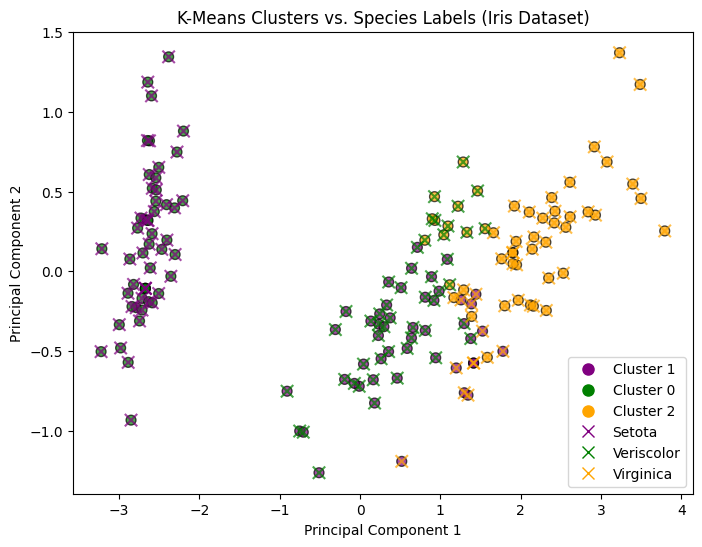

In [15]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

# Visualize clusters and species labels with legend
plt.figure(figsize=(8, 6))

# Define colors for clusters
colors = ['purple', 'green', 'orange']

# Create a list of colors for each data point based on cluster assignment
cluster_colors = [colors[cluster] for cluster in iris_df['cluster']]

# Scatter plot for clusters with specified colors
scatter_clusters = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_colors, marker='o', edgecolor='k', s=50, alpha=0.7, label='Clusters')

# Create a list of colors for each data point based on species
species_colors = [colors[species] for species in iris_df['species_encoded']]

# Scatter plot for species labels with specified colors
scatter_species = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=species_colors, marker='x', s=80, alpha=0.7, label='Species')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters vs. Species Labels (Iris Dataset)')

# Create legend elements with specified colors
legend_elements = [
    mlines.Line2D([], [], color=colors[0], marker='o', linestyle='None', markersize=8, label='Cluster 1'),
    mlines.Line2D([], [], color=colors[1], marker='o', linestyle='None', markersize=8, label='Cluster 0'),
    mlines.Line2D([], [], color=colors[2], marker='o', linestyle='None', markersize=8, label='Cluster 2'),
    mlines.Line2D([], [], color=colors[0], marker='x', linestyle='None', markersize=8, label='Setota'),
    mlines.Line2D([], [], color=colors[1], marker='x', linestyle='None', markersize=8, label='Veriscolor'),
    mlines.Line2D([], [], color=colors[2], marker='x', linestyle='None', markersize=8, label='Virginica')
]

# Display legend
plt.legend(handles=legend_elements, loc='best')

plt.show()

## Task B: Wine

### Load data

In [ ]:
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Descriptive analysis

In [ ]:
print("Number of columns: ", len(wine_df.columns))
print("Number of rows: ", len(wine_df))

Number of columns:  14
Number of rows:  178


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### Preprocessing

## Task C: WeatherAUS

### Load data

In [ ]:
weatherAUS_df = pd.read_csv('weatherAUS.csv')
weatherAUS_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


### Descriptive analysis

In [ ]:
print("Number of columns: ", len(weatherAUS_df.columns))
print("Number of rows: ", len(weatherAUS_df))

Number of columns:  14
Number of rows:  145460


In [ ]:
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   WindGustSpeed  135197 non-null  float64
 4   WindSpeed9am   143693 non-null  float64
 5   WindSpeed3pm   142398 non-null  float64
 6   Humidity9am    142806 non-null  float64
 7   Humidity3pm    140953 non-null  float64
 8   Pressure9am    130395 non-null  float64
 9   Pressure3pm    130432 non-null  float64
 10  Temp9am        143693 non-null  float64
 11  Temp3pm        141851 non-null  float64
 12  RainToday      142199 non-null  object 
 13  RainTomorrow   142193 non-null  object 
dtypes: float64(12), object(2)
memory usage: 15.5+ MB


### Preprocessing